# IMDb dataset Sentiment Analysis

Text classification (negative or positive reviews) using **Naive Bayes & Random Forest & Logistic Regression** on [IMDb dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

> **Odysseas Spyropoulos**, 3200183 <br />
> **Lydia Christina Wallace**, 3200125<br />
> **Miltos Tsolkas**, 3200213 <br />

* Firstly, we will need to install tensorflow, if we don't already have it

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


* Let's import the libraries that we will need

In [2]:
import tensorflow as tf
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt 
import pandas as pd 
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.utils import plot_model

# <ins>Part 1</ins>

## Load Data

* We will import the "IMDB Dataset" from `keras`
* We will split the data to `train`, `dev` and `test` datasets

In [3]:
# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data()

* Let's see the sizes of the arrays

In [4]:
print(x_train.shape, y_train.shape)  # print the dimensions of TRAIN dataset
print(x_test.shape, x_test.shape)  # print the dimensions TEST dataset

(25000,) (25000,)
(25000,) (25000,)


* Let's see what's inside!
* We will check the sequence of indices for the first movie review in the training set

In [5]:
# We sliced to get a wider array
x_train[0:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

* We don't want numbers
* We would like to work with words
* so we will **map the numbers to words!**

## Word Index Mapping

* We will create a new dictionary, `index2word`, where:
    * **Keys** are indices plus 3 (to accommodate special tokens)
    * **Values** are corresponding words from the `IMDb dataset`.

In [6]:
word_index = tf.keras.datasets.imdb.get_word_index()

# Create a mapping from index to word
index2word = dict((i + 3, word) for (word, i) in word_index.items())

# Add special tokens for padding ([pad]), beginning of the sentence ([bos]), and out-of-vocabulary ([oov]).
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'

* Let's see what we got and what we created

In [7]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
index2word

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

* Remember that the first review of `x_train` was like this:

In [9]:
x_train[0:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

* Now, for all datasets, we will convert the index sequences back to text using the `index2word` mapping.
* We will use list comprehensions to join words for each index sequence.

In [10]:
x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

In [11]:
x_train[0:1]

array(["[bos] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing a

* Now everything is set!
* We are ready to...

## Create the Vocabulary

* From the `x_train` reviews
* Removing the `n` most AND the `k` least frequent words
* We will keep the remaining, `m` more frequent words <br>
*Where `n`, `k`, `m` are hyperparameters*

In [12]:
def create_voc(x_train, n, k, m):
    
    # Save each word to voc_dict
    voc_dict = dict()
    for text in x_train:
        tokens = set(text.split())
        for token in tokens:
            if token in voc_dict:
                voc_dict[token] += 1
            else:
                voc_dict[token] = 1   
    voc_dict.pop('[bos]', ' ') # Pop the special token
    
    # Print the size of the vocabulary, without trimming it
    print(f"Vocabulary size: {len(voc_dict)}")
    
    # Sort by frequency (low to high)
    vocabulary = sorted(voc_dict.items(), key = lambda x:x[1])
    print(vocabulary[-50:]) # Just to check the 50 most frequent

    # Determine the k hyperparameter as the number of words with frequency=1
    print(f"k (number of words with freq=1): {sum(freq == 1 for word, freq in vocabulary)}")

    # Skip the k least and the n most frequent
    vocabulary = vocabulary[k:len(vocabulary) - n]
    return np.array([x[0] for x in vocabulary[len(vocabulary) - m:]])

# Determine the hyperparameters:
# n=50, by testing
# k=38839, words with freq=1
# m=1000, by testing
vocabulary = create_voc(x_train, 50, 38839, 1000) 
len(vocabulary)

Vocabulary size: 88077
[('when', 9031), ('more', 9065), ("it's", 9225), ('good', 9616), ('what', 9636), ('some', 9645), ('there', 9727), ('he', 9900), ('has', 10065), ('or', 10338), ('they', 10367), ('about', 10491), ('just', 10549), ('out', 10612), ('his', 10678), ('if', 10690), ('who', 11133), ('like', 11676), ('so', 11715), ('from', 11715), ('by', 11721), ('an', 12208), ('you', 12888), ('at', 12941), ('all', 13072), ('film', 13824), ('are', 13900), ('one', 14101), ('be', 14140), ('have', 14185), ('br', 14666), ('not', 14936), ('movie', 15233), ('on', 15710), ('as', 16118), ('was', 16164), ('with', 17467), ('for', 17884), ('but', 17979), ('i', 19230), ('that', 20041), ('it', 21332), ('in', 22039), ('is', 22427), ('this', 22637), ('to', 23475), ('of', 23726), ('and', 24164), ('a', 24174), ('the', 24793)]
k (number of words with freq=1): 38839


1000

* So we will use `vocabulary` with **1000 words**

## Create binary vectors

* Now, for all our datasets (`train`, `dev`, `test`).
* We will **tranform the texts to binary vectors**.
* With 0 or 1, if the word appears or not in the `vocabulary`.

In [13]:
x_train_binary = list()
x_test_binary = list()

# Binary vector for TRAIN data
for text in tqdm(x_train):
    tokens = text.split()
    binary_vector = list()
    for vocab_token in vocabulary:
        if vocab_token in tokens:
            binary_vector.append(1)
        else:
            binary_vector.append(0)
    x_train_binary.append(binary_vector)
x_train_binary = np.array(x_train_binary)

# Binary vector for TEST data
for text in tqdm(x_test):
    tokens = text.split()
    binary_vector = list()
    for vocab_token in vocabulary:
        if vocab_token in tokens:
            binary_vector.append(1)
        else:
            binary_vector.append(0)
    x_test_binary.append(binary_vector)
x_test_binary = np.array(x_test_binary)

  0%|          | 0/25000 [00:00<?, ?it/s]

100%|██████████| 25000/25000 [01:37<00:00, 255.27it/s]


* With the vectorizing we finished with preparing our data
* We will now move on to the implementation of our 3 classification algorithms:
    * [Naive Bayes](#Naive-Bayes)
    * [Random Forest](#Random-Forest)
    * [Logistic Regression](#Logistic-Regression)

## Implementing the algorithms

## **<span style="color:green ">Naive Bayes</span>**

To classify with Naive Bayes, the algorithm first needs to be trained using the training set <u> x_train_binary</u> and <u>y_train </u>. During training, Naive Bayes calculates the probabilities of the appearance of features/words for each category.
When it needs to classify a new sample, Naive Bayes uses Bayes' theorem to calculate the probability of the sample belonging to each category, considering its features and the probabilities calculated during training. The algorithm selects the category with the highest probability as the final category of the sample.

In our implementation, we chose not to provide any hyperparameter to Naive Bayes. Additionally, in classification with the Naive Bayes algorithm, we use logarithms to prevent numerical underflow during the calculation of probabilities.

The standard equation of Naive Bayes is as follows:

**$$ P(\text{Class} | \text{Features}) = \frac{P(\text{Features} | \text{Class}) \cdot P(\text{Class})}{P(\text{Features})} $$**


The logarithmic transformation simplifies computational processes:

**$$ \log(P(\text{Class} | \text{Features})) = \log(P(\text{Features} | \text{Class})) + \log(P(\text{Class})) - \log(P(\text{Features})) $$**

This ensures numerical stability and accuracy in problematic probability models.

### Coding Structure:
- **<span style="color:green ">__init__(self):</span>** Initializes the Naive Bayes classifier.
  Arguments -> self.x1_while_c_is_negative and self.x1_while_c_is_positive are lists that will store the probabilities of each word occurring given a negative or positive review respectively.
  Global variables -> self.p_c0 and self.p_c1 will store the overall probability of having a negative or positive review respectively.

- **<span style="color:green ">fit(self, X, Y):</span>** Trains the Naive Bayes classifier using the training data X (features) and Y (labels).
  Initializes counters and lists to calculate the frequency of each word in positive and negative reviews.
  Calculates the overall probability of having a positive or negative review (self.pc0 and self.pc1).
  Computes the conditional probabilities of each word given a negative or positive review. This involves counting how often each word appears in positive and negative reviews and then normalizing these counts to probabilities.
  The probabilities are rounded for better numerical stability.

- **<span style="color:green ">predict(self, X):</span>** Predicts the class (positive or negative) for each review in the test dataset X.
  Uses logarithms to prevent numerical underflow when dealing with very small probabilities. This is a common technique in Naive Bayes implementations.
  For each review, it calculates the log probabilities for both the negative and positive classes based on the features of the review and the probabilities computed during training. The class with the higher log probability is chosen as the predicted class.
  Returns a list of predictions where each prediction corresponds to the predicted class of a review in the test set.



In [14]:
class Naive_Bayes:

    def __init__(self):
        #lists with the probabilities of having each word given we have a negative or positive review correspondingly 
        self.x1_while_c_is_negative = list()
        self.x1_while_c_is_positive = list()
        #global variables with the probability of having a negative or positive review correspondingly
        self.p_c0 = float(0)
        self.p_c1 = float(0)

    def fit(self, X, Y):
        #Initialisations of elements:
        self.x1_while_c_is_negative = []
        self.x1_while_c_is_positive = []
        reviews = len(Y) 
        neg_reviews = 0 
        pos_reviews = 0
        sum_pos =  list() #For each position i in the array: How many times does the word i appear when we have a positive review
        sum_neg =  list() #For each position i in the array: How many times does the word i appear when we have a negative review
        p_ex_pos = list() #Each element represents for the word Xelement the probability: P( Xelement = 1 | C = 1) 
        p_ex_neg = list() #Each element represents for the word Xelement the probability: P( Xelement = 1 | C = 0) 

        #Calculation of the overall probability of having a positive or negative review:
        for i in range(reviews):
            if Y[i] == 0:
                neg_reviews += 1
            else:
                pos_reviews += 1
        self.pc0 = pos_reviews/reviews
        self.pc1 = neg_reviews/reviews

        #Calculation of probabilities for each word given that we have a negative or positive review, respectively:
        

        #Initialization of lists with counters
        for i in range(len(vocabulary)):
            #We already set it to 1 to avoid the absence of any word
            sum_pos.append(0) 
            sum_neg.append(0)

        for i in range(reviews):
            for j in range(len(vocabulary)):
                if(Y[i] == 0 and X[i][j]==1):
                    sum_neg[j] +=1
                elif(Y[i] == 1 and X[i][j]==1):
                    sum_pos[j] +=1
        

        #Lists of probabilities for each word given that we have a negative or positive review
        for i in range(0,1000):
            p_ex_pos.append(0) 
            p_ex_neg.append(0)
        #for i in range(len(p_ex_neg_train)):
        for i in range(len(vocabulary)):
            p_ex_neg[i] = (sum_neg[i]+1)/(neg_reviews+2) #P(Xi = 1 | C = 0) 
        for i in range(len(vocabulary)):
            p_ex_pos[i] = (sum_pos[i]+1)/(pos_reviews+2) #P(Xi = 1 | C = 1)

        p_ex_neg = np.round(p_ex_neg, decimals=2)
        p_ex_pos = np.round(p_ex_pos, decimals=2)

        self.x1_while_c_is_positive = p_ex_pos.copy()
        self.x1_while_c_is_negative = p_ex_neg.copy()

    def predict(self, X):

        # In Naive Bayes classification here we used logarithms to prevent numerical underflow when dealing with probabilities. 
        # The standard Naive Bayes equation is the following: 
        # P(Class∣Features) = P(Features∣Class) * P(Class) / P(Features)
        # The logarithmic transformation simplifies computations:
        # log(P(Class∣Features)) = log(P(Features∣Class)) + log(P(Class)) - log(P(Features))
        # This ensures numerical stability and precision in probabilistic models.


        predictions = list()
        epsilon = 1e-10  #small positive value to avoid errors
        for i in range(len(X)):

            # Initialize log probabilities
            log_pc0 = np.log(self.pc0)
            log_pc1 = np.log(self.pc1)

            # Calculate log probability for negative class (C=0)
            for xi in range(len(X[i])):
                if X[i][xi] == 0:
                    log_pc0 += np.log(1 - self.x1_while_c_is_negative[xi])
                else:
                    log_pc0 += np.log(self.x1_while_c_is_negative[xi] + epsilon)

            # Calculate log probability for positive class (C=1)
            for xi in range(len(X[i])):
                if X[i][xi] == 1:
                    log_pc1 += np.log(self.x1_while_c_is_positive[xi] + epsilon)
                else:
                    log_pc1 += np.log(1 - self.x1_while_c_is_positive[xi])

            if log_pc0 < log_pc1:
                predictions.append(1)
            else:
                predictions.append(0)

        return predictions

* Let's do a first test of the algorithm
* A more in depth analysis [down below](#Naive-Bayes-Curves-&-Table)

In [16]:
nb = Naive_Bayes()
nb.fit(x_train_binary, y_train)
y = nb.predict(x_test_binary)

print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     12500
           1       0.81      0.85      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.82     25000
weighted avg       0.83      0.83      0.82     25000



## **<span style="color:red ">Random Forest</span> & <span style="color:blue ">ID3</span>**
* **Random Forest calls repeatedly** the **ID3** algorithm.
* So let's implement this first.

## **<span style="color:blue ">ID3</span>**

The ID3 algorithm constructs decision trees for classification tasks by employing Information Gain to determine the most informative feature at each node. It starts with the entire dataset and iteratively splits the data based on the feature that results in the largest Information Gain, essentially reducing the most uncertainty or entropy. At each step, ID3 examines all unused attributes and calculates the Information Gain for splitting on each attribute, selecting the one with the highest gain. This process continues recursively, creating branches for each possible value of the selected feature, until it reaches a point where the data is perfectly classified or no further information can be gained, resulting in a leaf node with a classification decision. By using Information Gain as its criterion, ID3 efficiently constructs a decision tree that prioritizes the most discriminative features first, aiming to quickly narrow down the possible classifications.

  ### About the **<span style="color:blue ">Information Gain</span>** function:
  ### The formula for calculating the entropy is:
  **$$ H(\text{C}) = -P(\text{C=0})\log_{2}(P(\text{C=0})) -P(\text{C=1})\log_{2}(P(\text{C=1})) $$**
  ### And it is used in the calculation of the Information Gain as follows:
  **$$ IG(\text{Y},\text{Xi})= H(\text{C}) - P(\text{Xi = 1}) \cdot H(\text{C}|\text{Xi=1}) + P(\text{Xi} = \text{0}) \cdot H(\text{C}|\text{Xi}=\text{0}) $$**
  ### Which, if we want to alanlyze more, becomes:
  

**$$IG(Y,Xi)= H(C) -$$**
**$$(P(X=1) (-(P(C=1|X=1)\cdot \log_{2}(P(C=1|X=1))) - (P(C=0|X=1 )\cdot \log_{2}(P(C=0|X=1)))$$** 
**$$+ P(X=0)( -(P(C=1|X=0)\cdot \log_{2}(P(C=1|X=0))) - (P(C=0|X=0)\cdot \log_{2}(P(C=0|X=0))))$$**
  
  Entropy (H(C)) measures the unpredictability or disorder within a dataset, especially for binary classifications, and is essential for understanding the homogeneity of the samples. Information Gain (IG(Y, Xi)), on the other hand, measures the effectiveness of a particular feature in reducing this entropy, essentially quantifying how much uncertainty a feature can remove when creating a decision tree.
  ### Coding Structure for the **<span style="color:blue ">ID3</span>**:
- **IG(Y, Xi)**: Calculate the Information Gain of a feature Xi in the dataset.
  - Calculates the entropy (H(C)) of the class labels (C) in the dataset. Entropy is a measure of the uncertainty or impurity in the class distribution.
  - For each value (0 or 1) that the feature Xi can take, it calculates the conditional entropy of the class given that feature value (H(C|Xi)).
  - Information Gain is then computed as the difference between the original entropy and the weighted sum of these conditional entropies. It measures the reduction in entropy or surprise from revealing the feature.
- **class Tree()**: Represent a node in the decision tree.
  - <span style="color:blue "> word </span>: The word used for splitting at this node.
  - <span style="color:blue ">tag </span> : Indicates if the node corresponds to a positive or negative classification based on the splitting word.
  - <span style="color:blue ">children </span> : A list of child nodes stemming from this node.
  - <span style="color:blue ">classification </span> : The final classification decision at this node, only assigned at leaf nodes.
- **__init__(self, max_depth = 10)**: Initialize the ID3 algorithm with a maximum depth for the tree.
- **most_IG(self, X, Y, vocabulary)**: Determine which word from the vocabulary has the highest Information Gain and should be used to split the data at the current node.
- **fit(self, X, Y, vocabulary, default)**: Recursively build the tree from the training data. At each node, it uses the word with the highest Information Gain to split the data, creates child nodes, and continues the process until the maximum depth is reached, all words are used, or the data is perfectly classified.
- **singular_prediction(self, X, tree)**: Make a prediction for a single instance by traversing the tree based on the features of the instance and returning the classification at the leaf node.
- **predict(self, tree, X)**: Make predictions for a set of instances by applying singular_prediction to each.

In [15]:
def IG(Y, Xi):

    #Part A: Calculating the H(C) = -P(C=0)*log2(P(C=0)) -P(C=1)*log2(P(C=1))
    Hc = 0
    for c in range(2):
        pc = list(Y).count(c)/len(Y) #P(C=Ci) = (Number of Ci)/(All C instances)
        Hc += - pc * math.log(pc, 2)

    #Part B: Calculating the IG(Y,Xi)= H(C) - P(Xi = 1)*H(C|Xi=1) + P(Xi = 0)*H(C|Xi=0)
    #this will happen in two repetitions: one for Xi=0 and one for Xi=1
    Hc_second = 0
    for feature in range(2):
        p = list(Xi).count(feature)/len(Xi) #P(X = i) = (Number of Xi=feat)/(All features of Xi)
        
        #finding the number of Y instances for which X=Xi, which will be used for calculating the P(C=c|X=x)
        Ys = list()  
        for i in range(len(Xi)):
            if Xi[i] == feature:
                Ys.append(Y[i])

        #Calculating the H(C=c|X=x) = ( -(P(C=1|X=x)*log2(P(C=1|X=x))) - (P(C=0|X=x)*log2(P(C=0|X=x))) (for x in [0,1])
        for c in range(2):
            if len(Ys)!=0:
                pc_while_x = Ys.count(c)/len(Ys) #P(C=c|X=x) = (Instances of C for which C=c and X=x)/(All instances of C for which X=x)
                if pc_while_x != 0:
                    H = - p * pc_while_x * math.log(pc_while_x, 2)
                    Hc_second += H
    ig = Hc - Hc_second
    return ig    


class Tree():
    def __init__(self):
        self.word = "no word yet" #The word used for the classification of a subtree
        self.tag = None #1 if the node has reviews with the word used for classification, 0 if they do not have it.
        self.children = list() #Children of a node
        self.classification = int #The final classification. Takes a value only if the classification has been executed.
    
    def new_child(self, node):
        self.children.append(node)

class ID3():
    def __init__(self, max_depth = 10):
        self.max_depth = max_depth
        self.depth = 0

    def most_IG(self, X, Y, vocabulary):

        max_gain = -1
        max_word= -1


        for w in vocabulary:
            x_word = list() #List of all the values that a word will take in variable X
            for ex in range(len(X)):
                x_word.append(X[ex][w])
            word_ig = IG(Y, x_word) #We send Y and the list to IG to find the information gain of the word relative to Y.

            if(word_ig>max_gain):
                max_gain = word_ig
                max_word = w

        return max_word #The word with the maximum Information Gain

    def fit(self, X, Y, vocabulary, default):
       
        if(len(Y) == 0):
            #If we have reached this point, the Y values are finished because the classification of each review in the tree is complete.
            #The value of the classification becomes the one that prevailed at the above level of the tree.
            node = Tree()
            node.classification = default 
            return node 

        if(len(set(Y)) == 1):
            # The set method returns a set with all the different values contained in its argument, here Y.
            # So, if we have reached this point and Y has only one value, which will be used in the classification, the process stops. 
            node = Tree()
            node.classification = Y[0]
            return node

        if(len(vocabulary) == 0):
            # If we have reached this point, we have used all the words, so no further classifications are made.
            # The process stops, and it is classified with the value that prevails in Y.
            node = Tree()
            if(Y.count(0)>Y.count(1)):
                max_count = 0
            else:
                max_count = 1
            node.classification = max_count
            return node

        if (self.depth == self.max_depth):
            # If we are here, we have reached the max depth of the tree.
            # The process stops, and it is classified with the value that prevails in Y.
            # If there is a tie between negative and positive reviews, we take the default, which is the one that prevailed at the above level.
            node = Tree()
            if((Y.count(0))>Y.count(1)):
                node.classification = 0
            elif((Y.count(0))<Y.count(1)):
                node.classification = 1
            else:
                node.classification =default
            return node

        #The process stops if either 0 or 1 prevails in the remaining reviews.
        if (float(Y.count(1))/float(len(Y))>= 0.75):
            node = Tree()
            node.classification = 1                   
            return node
        
        if(float(Y.count(0))/float(len(Y))>= 0.75):
            node = Tree()
            node.classification = 0
            return node

        #Save the prevailing classification so far to be passed as the default in the subsequent levels.
        if(Y.count(1)>Y.count(0)):
            max_count = 1
        else:
            max_count = 0


        best_word = self.most_IG(X, Y, vocabulary) #Finding the word with the highest Information Gain 
        tree = Tree() #Initialization of the tree

        #The new vocabulary, excluding the word that will be used for the split into leaves, so that it is not reused afterward.
        new_vocabulary = vocabulary.copy() 
        new_vocabulary.remove(best_word)
        self.depth += 1 #updating the depth

        for zero_or_one in range(2):
            #The new lists of reviews, because of the for two lists are created for each category (Y and X), one with the best_word and one without
            x_new = list()
            y_new = list()
            for i in range(len(X)):
                if X[i][best_word] == zero_or_one:
                    x_new.append(X[i])
                    y_new.append(Y[i])
            subtree = self.fit(x_new, y_new, new_vocabulary, max_count)
            subtree.tag = zero_or_one 
            subtree.word = best_word
            tree.new_child(subtree)            
                
        return tree

    def singular_prediction(self, X, tree):
        sub_tree = tree #Initialization of subtree
        flag = False
        while not flag:
            word_feature = sub_tree.children[0].word #We take the word with which the division happens
            for sub in sub_tree.children:
                if (sub.tag == X[word_feature]): 
                    #If the word-criterion, with which the division happened on this level, exists
                    # we move to the subtree in which the tag is 1 (which means it has reviews that include that word), 
                    # or else we move to the subtree in which the tag is 0
                    sub_tree = sub
            if(sub_tree.classification == 1 or sub_tree.classification == 0):
                # We stop when we reach a leaf. Leaves have the value 0 or 1 and that value ends up to become the sample's classification
                # All others intermediate nodes have None as the classification value.
                flag = True
        return sub_tree.classification

    def predict(self, tree, X):
        y_pred = list()
        for i in range(len(X)):
            y_pred.append(self.singular_prediction(X[i], tree)) #prediction for each review separately
        
        return y_pred

* Let's test the ID3 as well!
* We chose to use 400 features an indicative parameter

In [18]:
model = ID3(400)

y_train_list = y_train.tolist()
y_test_list = y_test.tolist()

vocabulary_indexes = list()
for i in range(len(vocabulary)):
    vocabulary_indexes.append(i)

trained_tree = model.fit(x_train_binary, y_train_list, vocabulary_indexes, 0)
y_pred = model.predict(trained_tree, x_train_binary)

print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     12500
           1       0.81      0.85      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.82     25000
weighted avg       0.83      0.83      0.82     25000



## **<span style="color:red ">Random Forest</span>**

Random Forest is an effective machine learning model based on the ID3 algorithm for creating decision trees. Random Forest operates by taking random samples from the dataset and training multiple ID3 trees. Each tree categorizes the data based on a different subset of words from our database. Eventually, the model aggregates the predictions from all the trees and selects the most frequent category as the final prediction. The strength of Random Forest arises from the ensemble of different trees, achieving balanced and reliable predictions, regardless of the nature of the data (positive or negative) used for training.

Regarding the hyperparameters we used, we give the Random Forest initialization a number n of words that will form the subset of the vocabulary to be processed and a number of trees.

We noticed that since the selection of n words happens randomly, the algorithms always give a different percentage of successful predictions. The results varied from 65% to almost 75%. Although the results change in every execution, we noticed that we achieve the best results with the combinations:

- <span style="color:red "> 300 words</span> and <span style="color:red "> 8 trees </span> which reached 73.551% (training) and 73.472% (testing)
- <span style="color:red "> 400 words </span> and <span style="color:red "> 8 trees </span> which reached 73.024% (training) and 73.012% (testing)
- <span style="color:red "> 400 words </span> and<span style="color:red ">  9 trees </span>  which reached 74.156% (training) and 74.084% (testing)

We concluded that <u> 400 words and 9 trees </u> is the better case, and so we used these parameters for the result curves and arrays.  

  
  ### Coding Structure for Random Forest:
- **_init_(self, num_of_words, trees = 10)**: Initialize the Random Forest classifier.
  - <span style="color:red"> self.num_of_word  </span>: The number of words to consider from the vocabulary for creating the trees.
  - <span style="color:red">self.trees  </span> : The number of decision trees to create in the forest.
  - <span style="color:red">self.forest </span>: A list that will hold all the decision trees.
- **new_sample(self, X, Y)**: Generate a new sample from the dataset. Randomly selects instances from the dataset to create a subsample.
- **new_vocabulary(self, X)**: Create a new subset of vocabulary words. Randomly selects a set of words from the full vocabulary. Each decision tree in the forest will use this subset of words to make decisions which helps to ensure that the trees in the forest are diverse.
- **fit(self, X, Y, max_depth = 10)**: Build the forest by creating individual decision trees.
  - For each tree, it creates a new sample and a new subset of words.
  - It then initializes an ID3 decision tree and fits it to the data.
  - The completed tree is added to the forest.
- **predict(self, X)**: Predict the class for each instance in the dataset.
  - For each instance, each tree in the forest makes a prediction.
  - The predictions are tallied, and the class with the majority vote is chosen as the final prediction for that instance.
  - Returns a list of predictions, one for each instance.

In [16]:
class Random_Forest():
    def __init__(self, num_of_words, trees = 10):
        self.num_of_words = num_of_words #Αριθμός των λέξεων Number of words
        self.trees = trees #Numbers of trees to be created
        self.forest = list() #List of trees

    def new_sample(self, X, Y):
        # Initialization of the new x and y
        x_new = list()
        y_new = list()

        y_indexes = list() #Indexes of reviews that haven't be selected yet
        for i in range(len(Y)):
            y_indexes.append(i)

        for i in range(len(X)):
            #Random selection of reviews for the subset that the method will return, using the indexes that have been created above
            random_choice = random.choice(y_indexes) 
            x_new.append(X[random_choice])
            y_new.append(Y[random_choice])

        return x_new, y_new

    def new_vocabulary(self, X):
        # List with the indexes of the vocabulary for the random selection of new words for the new vocabulary that this method will return
        words_indexes = list()
        for x in range(len(X[0])):
            words_indexes.append(x)

        new_words = list()
        for i in range(self.num_of_words):
            random_word = random.choice(words_indexes) #Random selection of word
            words_indexes.remove(random_word) #Subtrackting the word from the old vocabulary 
            new_words.append(random_word) #Insertimg the word in the new vocabulary

        return new_words

    def fit(self, X, Y, max_depth = 10):
        for i in range(self.trees):
            id3 = ID3(max_depth) #Creating the ID3 tree
            random_x, random_y = self.new_sample(X, Y)
            tree = id3.fit(random_x, random_y, self.new_vocabulary(random_x), 0)
            self.forest.append(tree)

    def predict(self, X):
        y_pred = list()
        for i in range(len(X)):
            zeros =0
            ones = 0
            for j in range(self.trees):
                id3 = ID3()
                prediction = id3.singular_prediction(X[i], self.forest[j])
                if (prediction == 1):
                    ones += 1
                elif(prediction==0):
                    zeros +=1
            if ones>zeros:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return y_pred

* Let's check the final algorithm as well
* A more in depth analysis [down below](#Random-Forest-Curves-&-Table)

In [20]:
rf = Random_Forest(400,8)
trained_forest = rf.fit(x_train_binary, y_train_list)
y = rf.predict(x_test_binary)

print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71     12500
           1       0.71      0.80      0.75     12500

    accuracy                           0.73     25000
   macro avg       0.74      0.73      0.73     25000
weighted avg       0.74      0.73      0.73     25000



## Logistic Regression

* We implemented **Logistic Regression** with **stochastic gradient descent**.
* By iterating over the entire dataset (`X`) for a fixed number of iterations (`self.n_iters`)
* For each iteration, a random training example is selected (`rand_example`) to update the weights.
* *This randomness introduces variability in the updates, making it a form of stochastic gradient descent*

* **Initialization**
    * `learning_rate` and `n_iters` are initialized to 0.001 and 100 by testing with multiple combinations.
    * The weights are initialized to zeros.

* `fit()`
    * Iteratively, `n_iters` times, updates the model weights using stochastic gradient descent.
$$\vec{\mathbf{w}} = \vec{\mathbf{w}} - \eta \cdot (\mathbf{X}_{\text{rand}}^T \cdot (\sigma(\mathbf{X}_{\text{rand}} \cdot \vec{\mathbf{w}}) - \mathbf{y}_{\text{rand}}))$$
        * **$\vec{\mathbf{w}}$** represents the weight vector
        * **η** is the `learning_rate`.
        * **$\mathbf{X}_{\text{rand}}^T$** is the feature vector for the randomly selected training example (`X[rand_example, :]`).
        * **σ** denotes the sigmoid activation function.
        * **$\mathbf{y}_{\text{rand}}$** is the true label for the randomly selected training example.

* `predict()`
    * Computes the linear prediction for each example in the input data.
    * Applies the sigmoid function to obtain the predicted probability of belonging to class 1.
    * Assigns a binary class label (0 or 1) based on a threshold (0.5 by default).

<img src="sigmoid.png" alt="sigmoid" width="300"/>

In [17]:
class LogisticRegression():

    def __init__(self, learning_rate=0.001, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None

    def fit(self, X, y):
        n_examples = X.shape[0]
        n_features = X.shape[1]

        self.weights = np.zeros(n_features)

        for i in range(self.n_iters):
            for j in range(n_examples):
                # Select a random training example
                rand_example = np.random.randint(n_examples)

                linear_pred = np.dot(X[rand_example, :], self.weights)
                prediction = self.sigmoid(linear_pred)
                dw = X[rand_example, :] * (prediction - y[rand_example])

                # SGD
                self.weights = self.weights - self.learning_rate * dw


    def predict(self, X):
        linear_pred = np.dot(X, self.weights)
        class_pred = [0 if y<=0.5 else 1 for y in linear_pred]
        return class_pred

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

* Finally, let's test it quickly
* A more in depth analysis [down below](#Logistic-Regression-Curves-&-Table).

In [22]:
lr = LogisticRegression()
cost_list = lr.fit(x_train_binary, y_train)
y_pred = lr.predict(x_test_binary)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     12500
           1       0.88      0.82      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



* For the last section of part 1
* We will create the **curves** and the according **tables**

# Training-Test Curves & Tables

* Now, for all 3 algorithms, we will create 4 curves for each of the according metrics:
    * **Accuracy**: The proportion of correctly classified instances among the total instances, **indicating overall predictive performance**.
    * **Precision**: The ratio of correctly predicted positive observations to the total predicted positives, **measuring the accuracy of positive predictions**.
    * **Recall**: The ratio of correctly predicted positive observations to the total actual positives, **assessing the ability to capture all positive instances**.
    * **F1 Score**: The harmonic mean of precision and recall, providing **a balanced measure of a model's performance on positive class predictions**.


* `custom_curve` will print 4 curves, each time we call it (for each algorithm)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def custom_curve(estimator, training_features, training_labels, test_features, test_labels, num_splits, plot_title):
    # Calculate the size of each training data split.
    size_per_split = int(len(training_features) / num_splits)

    # Split the training data and labels into num_splits equal parts.
    feature_splits = np.split(training_features, num_splits)
    label_splits = np.split(training_labels, num_splits)

    # Initialize lists to store various performance metrics.
    training_accuracy, test_accuracy = list(), list()
    training_precision, test_precision = list(), list()
    training_recall, test_recall = list(), list()
    training_f1_score, test_f1_score = list(), list()

    # Create a 2x2 grid of subplots for plotting the metrics.
    figure, ((accuracy_ax, precision_ax), (recall_ax, f1_score_ax)) = plt.subplots(2, 2, figsize=(8, 8), dpi=100, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
    figure.suptitle("Plots for {title}".format(title=plot_title), fontsize=16)

    # Use the first split as the initial training set.
    current_features = feature_splits[0]
    current_labels = label_splits[0]

    # Fit the estimator using the current training set and make predictions.
    estimator.fit(current_features, current_labels)
    training_predictions = estimator.predict(current_features)
    test_predictions = estimator.predict(test_features)

    # Calculate and append metrics for the training and test sets.
    training_accuracy.append(accuracy_score(current_labels, training_predictions))
    test_accuracy.append(accuracy_score(test_labels, test_predictions))
    training_precision.append(precision_score(current_labels, training_predictions))
    test_precision.append(precision_score(test_labels, test_predictions))
    training_recall.append(recall_score(current_labels, training_predictions))
    test_recall.append(recall_score(test_labels, test_predictions))
    training_f1_score.append(f1_score(current_labels, training_predictions))
    test_f1_score.append(f1_score(test_labels, test_predictions))

    # Iteratively train the model with more data and track performance.
    for i in range(1, len(feature_splits)):
        # Incrementally add more data to the training set.
        current_features = np.concatenate((current_features, feature_splits[i]), axis=0)
        current_labels = np.concatenate((current_labels, label_splits[i]), axis=0)

        # Re-fit the estimator and make new predictions.
        estimator.fit(current_features, current_labels)
        training_predictions = estimator.predict(current_features)
        test_predictions = estimator.predict(test_features)

        # Update the performance metrics.
        training_accuracy.append(accuracy_score(current_labels, training_predictions))
        test_accuracy.append(accuracy_score(test_labels, test_predictions))
        training_precision.append(precision_score(current_labels, training_predictions))
        test_precision.append(precision_score(test_labels, test_predictions))
        training_recall.append(recall_score(current_labels, training_predictions))
        test_recall.append(recall_score(test_labels, test_predictions))
        training_f1_score.append(f1_score(current_labels, training_predictions))
        test_f1_score.append(f1_score(test_labels, test_predictions))

    # Prepare the x-axis for the plots (training size).
    training_sizes = list(range(size_per_split, len(training_features) + size_per_split, size_per_split))

    # Plot training and test accuracy.
    accuracy_ax.plot(training_sizes, training_accuracy, 'o-', color="b", label='Training')
    accuracy_ax.plot(training_sizes, test_accuracy, 'o-', color="red", label='Test')
    accuracy_ax.set_title('Accuracy')
    accuracy_ax.legend(loc="best")

    # Plot training and test precision.
    precision_ax.plot(training_sizes, training_precision, 'o-', color="b", label='Training')
    precision_ax.plot(training_sizes, test_precision, 'o-', color="red", label='Test')
    precision_ax.set_title('Precision')
    precision_ax.legend(loc="best")

    # Plot training and test recall.
    recall_ax.plot(training_sizes, training_recall, 'o-', color="b", label='Training')
    recall_ax.plot(training_sizes, test_recall, 'o-', color="red", label='Test')
    recall_ax.set_title('Recall')
    recall_ax.legend(loc="best")

    # Plot training and test F1 scores.
    f1_score_ax.plot(training_sizes, training_f1_score, 'o-', color="b", label='Training')
    f1_score_ax.plot(training_sizes, test_f1_score, 'o-', color="red", label='Test')
    f1_score_ax.set_title('F1 Score')
    f1_score_ax.legend(loc="best")

    # Display the plots.
    plt.show()

    # Compile and return the performance data.
    performance_data = {
        'Training Accuracy': training_accuracy,
        'Test Accuracy': test_accuracy,
        'Training Precision': training_precision,
        'Test Precision': test_precision,
        'Training Recall': training_recall,
        'Test Recall': test_recall,
        'Training F1 Score': training_f1_score,
        'Test F1 Score': test_f1_score
    }

    return performance_data

* After printing the curves.
* We will print a DataFrame with the exact scores for each part of training and testing (20->100 % of the dataset)
* We achieve that with `create_a_table()`

In [19]:
def create_a_table(datas):
    # Creating a table for the dataset
    # The table will demonstrate, for each dataset the:
    # Training Accuracy, Test Accuracy, Training Precision, Test Precision, Training Recall, Test Recall, Training F1 Score, and Test F1 Score
    df = pd.DataFrame(datas)
    
    # Adding Train Size (%) column based on row indices
    df.index = [20, 40, 60, 80, 100]
    df.index.name = "Train Data Size (%)"

    return df


* Let's finally finish **part 1**.
* For each algorithm we will create the result curves and then the detailed results tables 

## Naive Bayes Curves & Table

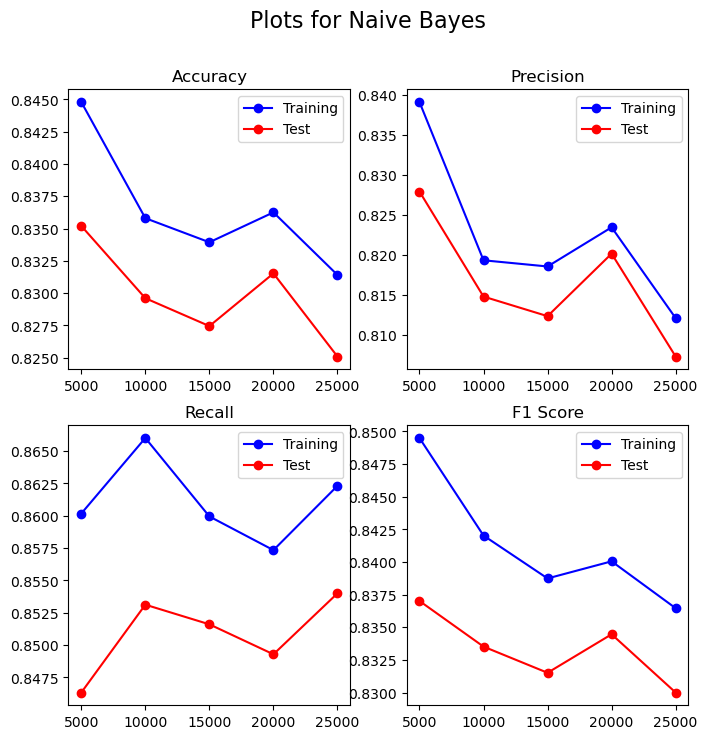

In [25]:
data = custom_curve(nb, x_train_binary, y_train, x_test_binary, y_test, 5, "Naive Bayes")

In [26]:
create_a_table(data)

,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
Train Data Size (%),,,,,,,,
20,0.844800,0.83520,0.839080,0.827907,0.860173,0.84632,0.849496,0.837012
40,0.835800,0.82960,0.819322,0.814792,0.866020,0.85312,0.842024,0.833516
60,0.833933,0.82744,0.818549,0.812347,0.859950,0.85160,0.838739,0.831511
80,0.836250,0.83152,0.823439,0.820148,0.857342,0.84928,0.840049,0.834460
100,0.831400,0.82508,0.812100,0.807305,0.862320,0.85400,0.836457,0.829997


## Random Forest Curves & Table

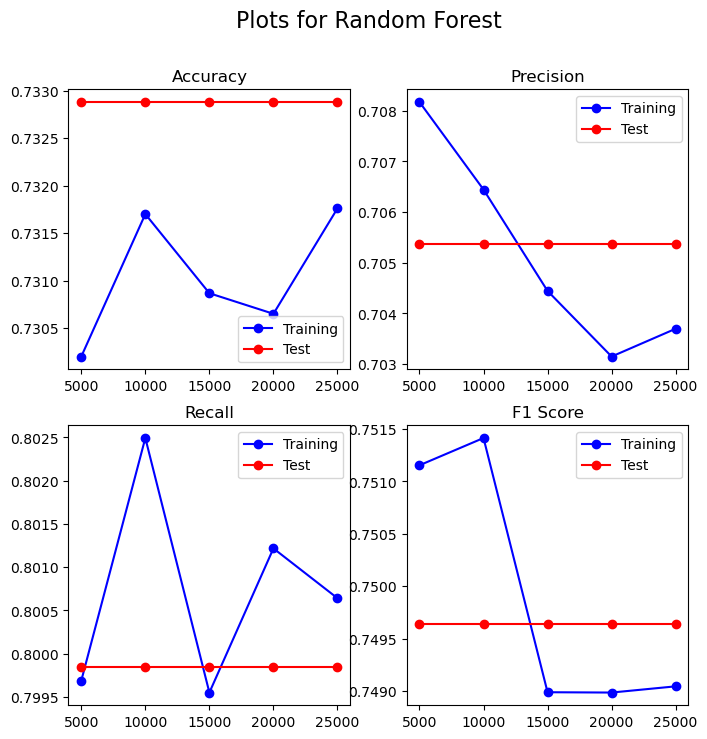

In [27]:
data = custom_curve(rf, x_train_binary, y_train, x_test_binary, y_test, 5, "Random Forest")

In [28]:
create_a_table(data)

,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
Train Data Size (%),,,,,,,,
20,0.730200,0.73288,0.708174,0.705376,0.799686,0.79984,0.751153,0.749644
40,0.731700,0.73288,0.706446,0.705376,0.802494,0.79984,0.751413,0.749644
60,0.730867,0.73288,0.704444,0.705376,0.799549,0.79984,0.748990,0.749644
80,0.730650,0.73288,0.703150,0.705376,0.801216,0.79984,0.748987,0.749644
100,0.731760,0.73288,0.703698,0.705376,0.800640,0.79984,0.749046,0.749644


## Logistic Regression Curves & Table

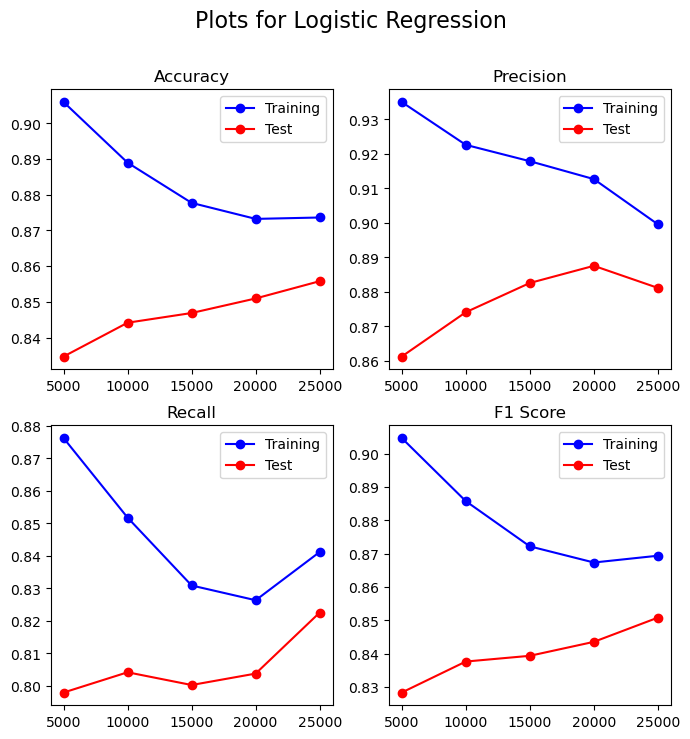

In [29]:
data = custom_curve(lr, x_train_binary, y_train, x_test_binary, y_test, 5, "Logistic Regression")

In [30]:
create_a_table(data)

,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
Train Data Size (%),,,,,,,,
20,0.906000,0.83468,0.935038,0.861238,0.876277,0.79792,0.904704,0.828371
40,0.889000,0.84416,0.922615,0.874087,0.851771,0.80416,0.885779,0.837667
60,0.877733,0.84688,0.917877,0.882566,0.830877,0.80024,0.872213,0.839389
80,0.873250,0.85096,0.912684,0.887544,0.826338,0.80376,0.867368,0.843577
100,0.873640,0.85580,0.899564,0.881138,0.841200,0.82256,0.869403,0.850842


# <ins>Part 2</ins>

* For this part, **we will compare each algorithm with its *Scikit-learn* implementation**.
* For this purpose we will create `compare_classification_models()` 
* It prints 4 plots as well but with 4 curves on each
    * 2 for **our implementation** (Train & Test)
    * 2 for **scikit-learns** (Train & Test)

In [20]:
def compare_classification_models(classifier1, classifier2, training_features, training_labels, testing_features, testing_labels, num_folds, name_classifier1, name_classifier2, expand_y_axis=False):
    # Calculate the size of each split for cross-validation
    fold_size = int(len(training_features) / num_folds)
    
    # Split the training data into 'num_folds' consecutive folds
    features_folds = np.split(training_features, num_folds) 
    labels_folds = np.split(training_labels, num_folds)

    # Initialize lists to store performance metrics for both classifiers
    classifier1_metrics = {'train_accuracy': [], 'test_accuracy': [], 'train_precision': [], 'test_precision': [], 'train_recall': [], 'test_recall': [], 'train_f1': [], 'test_f1': []}
    classifier2_metrics = {'train_accuracy': [], 'test_accuracy': [], 'train_precision': [], 'test_precision': [], 'train_recall': [], 'test_recall': [], 'train_f1': [], 'test_f1': []}

    # Set up the subplot figure
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16), dpi=100, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
    fig.suptitle(f"Comparing {name_classifier1} Vs {name_classifier2}", fontsize=16)

    # Loop through each fold for cross-validation
    for i, (curr_features, curr_labels) in enumerate(zip(features_folds, labels_folds)):
        print(f"Training on fold {i+1}/{num_folds}...")

        # Fit both classifiers on the current fold
        classifier1.fit(curr_features, curr_labels)
        classifier2.fit(curr_features, curr_labels)

        # Make predictions on the training fold and the entire testing set
        for metrics, clf in zip([classifier1_metrics, classifier2_metrics], [classifier1, classifier2]):
            train_predictions = clf.predict(curr_features)
            test_predictions = clf.predict(testing_features)
            
            # Calculate and store performance metrics for each classifier
            metrics['train_accuracy'].append(accuracy_score(curr_labels, train_predictions))
            metrics['test_accuracy'].append(accuracy_score(testing_labels, test_predictions))
            metrics['train_precision'].append(precision_score(curr_labels, train_predictions))
            metrics['test_precision'].append(precision_score(testing_labels, test_predictions))
            metrics['train_recall'].append(recall_score(curr_labels, train_predictions))
            metrics['test_recall'].append(recall_score(testing_labels, test_predictions))
            metrics['train_f1'].append(f1_score(curr_labels, train_predictions))
            metrics['test_f1'].append(f1_score(testing_labels, test_predictions))

    # Plotting the performance metrics over the folds for both classifiers
    x_axis = range(fold_size, len(training_features) + fold_size, fold_size)
    plot_metrics(ax1, x_axis, classifier1_metrics, classifier2_metrics, 'accuracy', name_classifier1, name_classifier2, expand_y_axis)
    plot_metrics(ax2, x_axis, classifier1_metrics, classifier2_metrics, 'precision', name_classifier1, name_classifier2, expand_y_axis)
    plot_metrics(ax3, x_axis, classifier1_metrics, classifier2_metrics, 'recall', name_classifier1, name_classifier2, expand_y_axis)
    plot_metrics(ax4, x_axis, classifier1_metrics, classifier2_metrics, 'f1', name_classifier1, name_classifier2, expand_y_axis)
    
    plt.show()
    # print(metrics_model2)
    # Return the collected metrics for both models.
    return classifier1_metrics, classifier2_metrics

def plot_metrics(axis, x_axis, metrics1, metrics2, metric_name, name1, name2, expand_y_axis):
    # Plotting utility function for drawing performance metrics on the axes
    axis.plot(x_axis, metrics1[f'train_{metric_name}'], 'o-', color="green", label=f'Training - {name1}')
    axis.plot(x_axis, metrics1[f'test_{metric_name}'], 'o-', color="red", label=f'Test - {name1}')
    axis.plot(x_axis, metrics2[f'train_{metric_name}'], 'o-', color="blue", label=f'Training - {name2}')
    axis.plot(x_axis, metrics2[f'test_{metric_name}'], 'o-', color="orange", label=f'Test - {name2}')
    axis.legend(loc="best")
    if expand_y_axis:
        axis.set_ylim([0.0, 1.0])
    axis.set_xlabel('Training Size')
    axis.set_ylabel(f'{metric_name.title()} Score')
    axis.set_title(f'{metric_name.title()}')

## Naive Bayes Vs BernouliNB

Training on fold 1/5...
Training on fold 2/5...
Training on fold 3/5...
Training on fold 4/5...
Training on fold 5/5...


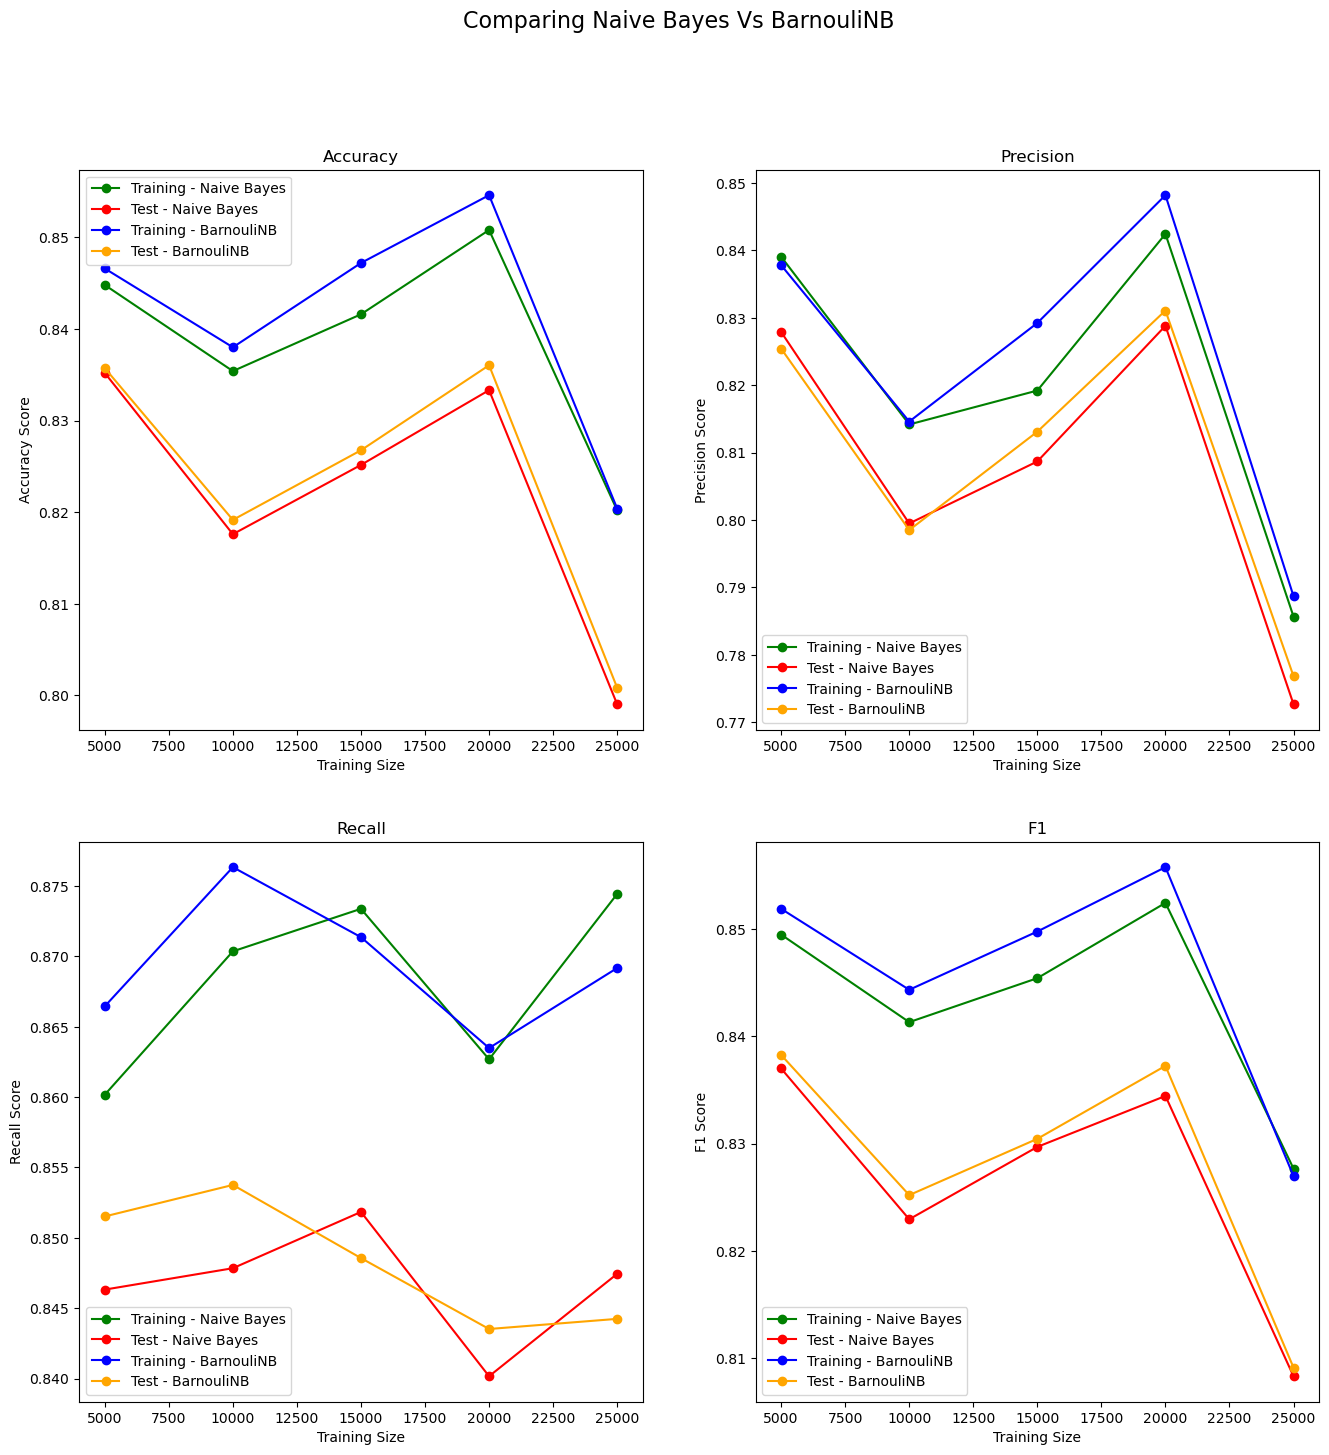

In [32]:
Bernouli = BernoulliNB()
estimator = Naive_Bayes()
classifier1_metrics, classifier2_metrics = compare_classification_models(estimator,  Bernouli , x_train_binary, y_train , x_test_binary, y_test,  5,  "Naive Bayes", "BarnouliNB")

* As before, we will print the DataFrames, explaining our curves
* One for each classifier

* Firstly, for **our Naive Bayes**.

In [33]:
create_a_table(classifier1_metrics)

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
Train Data Size (%),,,,,,,,
20,0.8448,0.83520,0.839080,0.827907,0.860173,0.84632,0.849496,0.837012
40,0.8354,0.81760,0.814179,0.799487,0.870363,0.84784,0.841334,0.822954
60,0.8416,0.82516,0.819213,0.808688,0.873387,0.85184,0.845433,0.829704
80,0.8508,0.83332,0.842455,0.828822,0.862690,0.84016,0.852453,0.834452
100,0.8202,0.79904,0.785662,0.772648,0.874443,0.84744,0.827679,0.808317


* Afterwards, for **BernouliNB**.

In [34]:
create_a_table(classifier2_metrics)

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
Train Data Size (%),,,,,,,,
20,0.8466,0.83572,0.837828,0.825436,0.866457,0.85152,0.851902,0.838275
40,0.8380,0.81916,0.814609,0.798504,0.876346,0.85376,0.844350,0.825208
60,0.8472,0.82676,0.829240,0.813108,0.871371,0.84856,0.849784,0.830456
80,0.8546,0.83604,0.848211,0.831087,0.863491,0.84352,0.855783,0.837257
100,0.8204,0.80084,0.788681,0.776813,0.869178,0.84424,0.826975,0.809124


## Random Forest Vs RandomForestClassifier

* We will compare them with the same hyperparameters:
    * **Number of words: 400**
    * **Number of trees: 8**
    * **Max depth: 10** (the default in ours)

Training on fold 1/5...
Training on fold 2/5...
Training on fold 3/5...
Training on fold 4/5...
Training on fold 5/5...


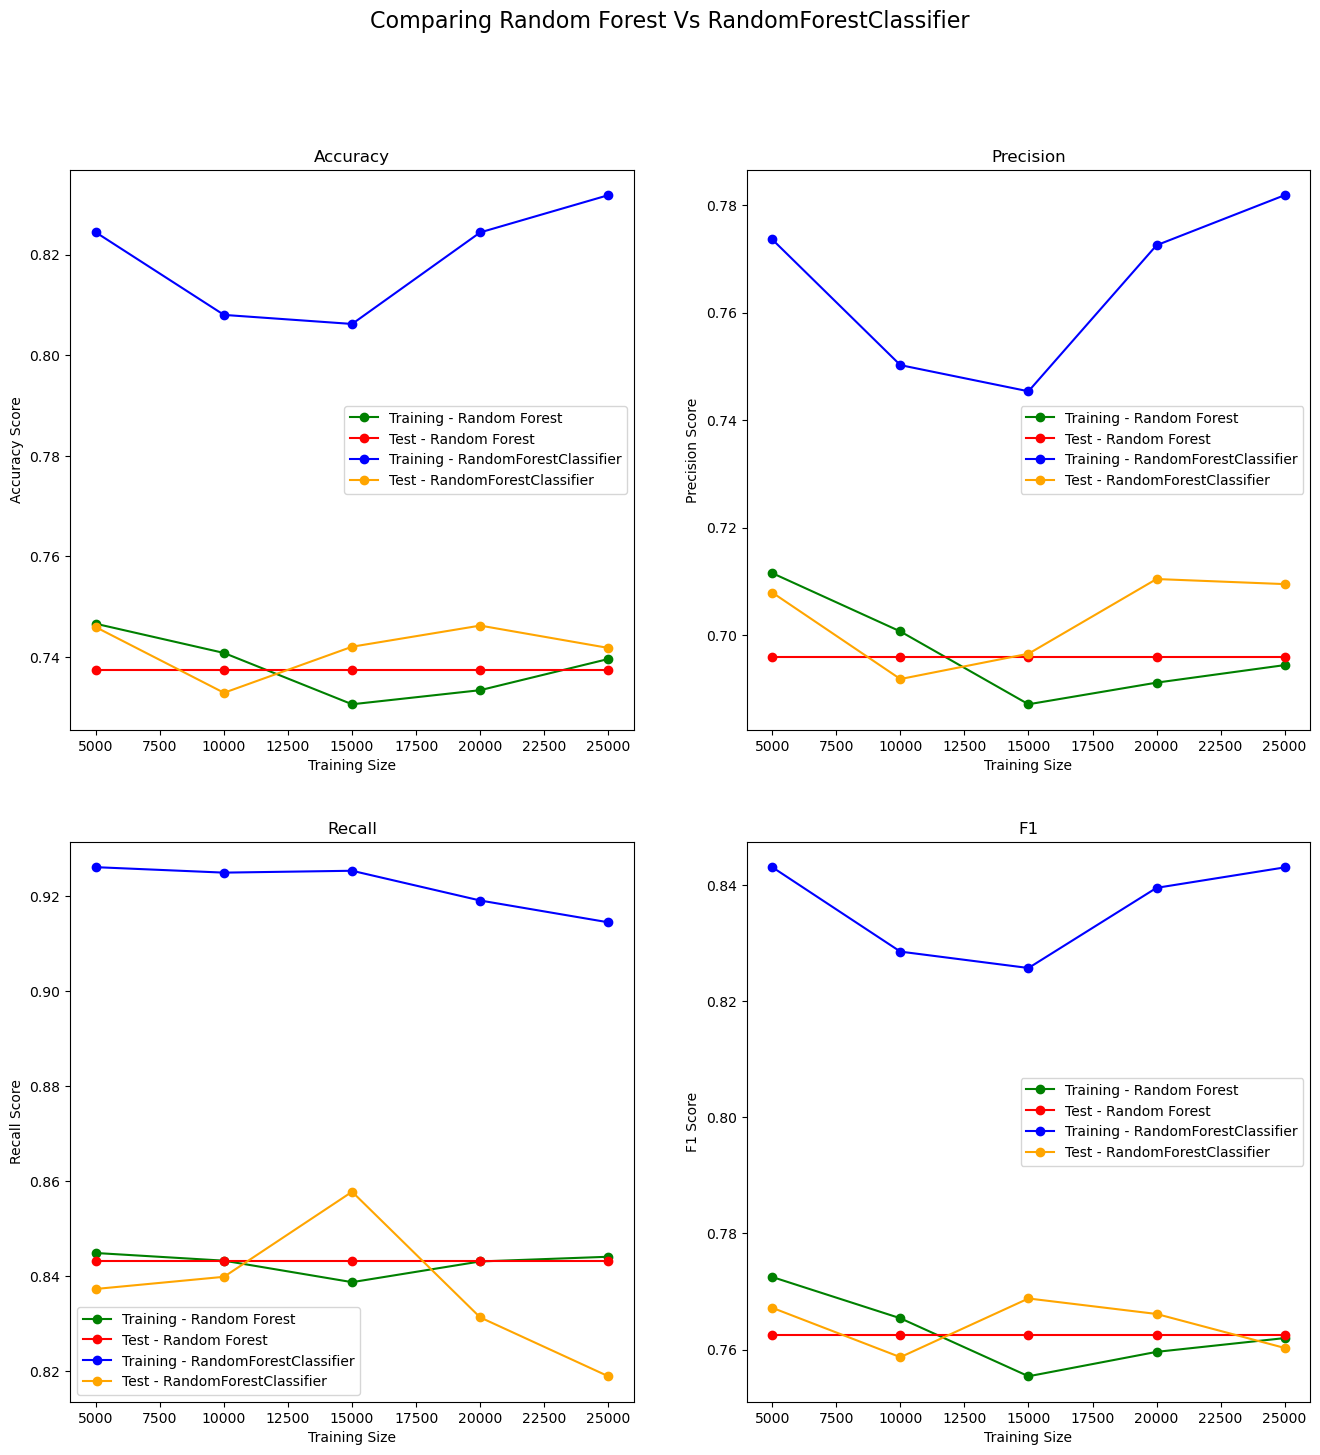

In [35]:
tool = Random_Forest(400,8)
tool2 = RandomForestClassifier(8, max_depth=10, max_features=400)
classifier1_metrics, classifier2_metrics = compare_classification_models(tool,  tool2 , x_train_binary, y_train , x_test_binary, y_test,  5,  "Random Forest", "RandomForestClassifier")

* And the DataFrame for **our Random Forest**.

In [36]:
create_a_table(classifier1_metrics)

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
Train Data Size (%),,,,,,,,
20,0.7466,0.73736,0.711545,0.695893,0.844855,0.8432,0.772491,0.762497
40,0.7408,0.73736,0.700696,0.695893,0.843239,0.8432,0.765387,0.762497
60,0.7306,0.73736,0.687149,0.695893,0.838710,0.8432,0.755402,0.762497
80,0.7334,0.73736,0.691172,0.695893,0.843074,0.8432,0.759603,0.762497
100,0.7396,0.73736,0.694435,0.695893,0.844066,0.8432,0.761974,0.762497


* And for **RandomForestClassifier**.

In [37]:
create_a_table(classifier2_metrics)

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
Train Data Size (%),,,,,,,,
20,0.8244,0.74592,0.773622,0.707927,0.926159,0.83728,0.843046,0.767190
40,0.8080,0.73288,0.750243,0.691841,0.925010,0.83984,0.828510,0.758690
60,0.8062,0.74204,0.745372,0.696550,0.925403,0.85776,0.825688,0.768795
80,0.8244,0.74624,0.772544,0.710447,0.919135,0.83128,0.839488,0.766128
100,0.8318,0.74180,0.781856,0.709503,0.914540,0.81888,0.843009,0.760278


## Logistic Regression Vs SGDClassifier

* It would seem logical to compare our `LogisticRegression()` with `sklearn.linear_model.LogisticRegression`.
* But our model is closer to `sklearn.linear_model.SGDClassifier` because it uses **Stochastic Gradient Descent (SGD)** for optimization in `fit()`.
    * It updates the model parameters using a single randomly selected data point at a time
* On the other hand, `sklearn.linear_model.LogisticRegression` typically uses optimization algorithms like Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS) or other solvers that operate on the entire dataset.
* So we will compare our with `sklearn.linear_model.SGDClassifier`
* References
    * [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
    * [sklearn.linear_model.SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

* We will compare the models with the same ideal hyperparameters (ours default):
    * **Max Iterations: 100**
    * **Learning Rate: 0.001** 

Training on fold 1/5...
Training on fold 2/5...
Training on fold 3/5...
Training on fold 4/5...
Training on fold 5/5...


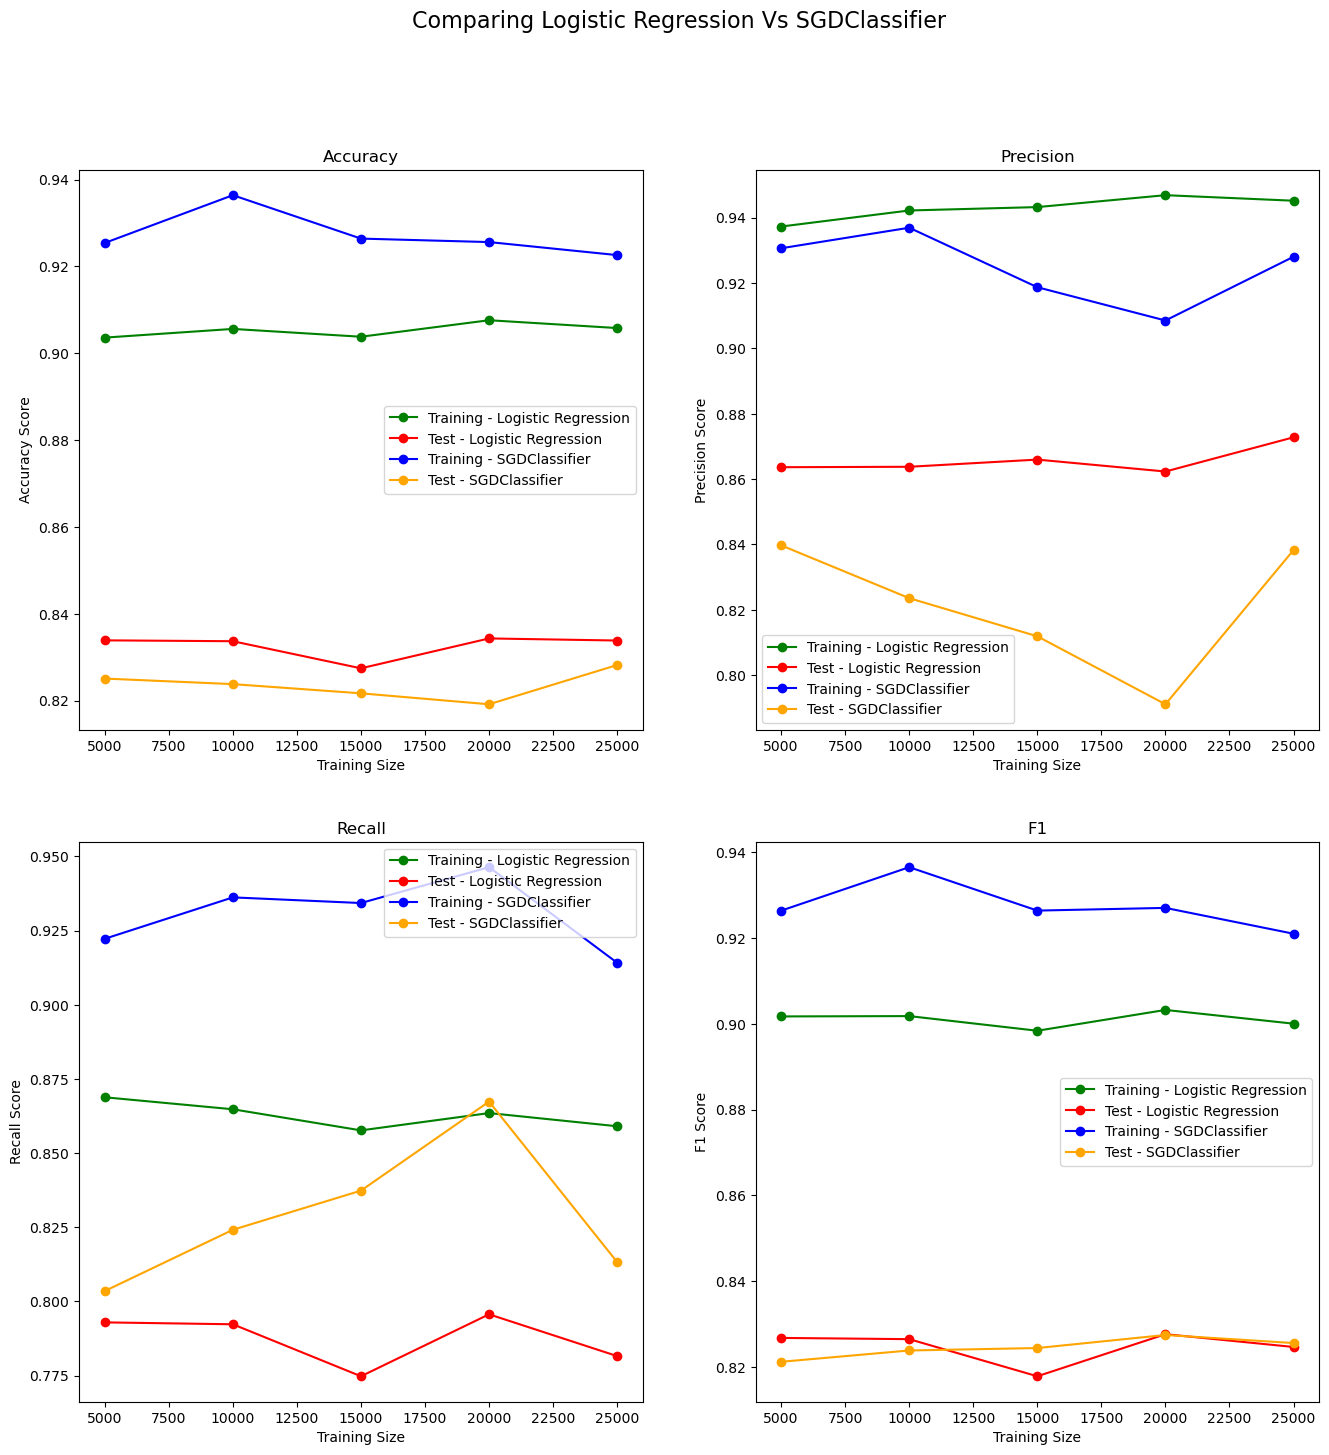

In [38]:
lr = LogisticRegression()
sgd = SGDClassifier(max_iter=100, alpha=0.001)
classifier1_metrics, classifier2_metrics = compare_classification_models(lr,  sgd , x_train_binary, y_train , x_test_binary, y_test,  5,  "Logistic Regression", "SGDClassifier")

* And here's **our Logistic Regression** DataFrame. 

In [39]:
create_a_table(classifier1_metrics)

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
Train Data Size (%),,,,,,,,
20,0.9036,0.83388,0.937288,0.863640,0.868814,0.79296,0.901753,0.826792
40,0.9056,0.83368,0.942199,0.863771,0.864779,0.79232,0.901830,0.826504
60,0.9038,0.82744,0.943237,0.865969,0.857661,0.77480,0.898416,0.817852
80,0.9076,0.83432,0.946883,0.862320,0.863491,0.79568,0.903266,0.827661
100,0.9058,0.83384,0.945187,0.872789,0.859052,0.78160,0.900064,0.824681


* And **SGDClassifier's** 

In [40]:
create_a_table(classifier2_metrics)

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
Train Data Size (%),,,,,,,,
20,0.9254,0.82508,0.930638,0.839729,0.922231,0.80352,0.926415,0.821226
40,0.9364,0.82380,0.936926,0.823567,0.936179,0.82416,0.936552,0.823863
60,0.9264,0.82168,0.918715,0.811899,0.934274,0.83736,0.926429,0.824433
80,0.9256,0.81916,0.908532,0.791098,0.946357,0.86736,0.927059,0.827476
100,0.9226,0.82820,0.928043,0.838295,0.914135,0.81328,0.921037,0.825598


# <ins>Part 3</ins>

## RNN 

In [21]:
class RNN:

    def __init__(self, vocabulary, VOCAB_SIZE = 100000, SEQ_MAX_LENGTH = 250, epochs=3, verbose=1, batch_size=32):
        self.vectorizer = self.create_vec(VOCAB_SIZE, SEQ_MAX_LENGTH, vocabulary)
        self.imdb_bigru = self.get_bigru()
        self.imdb_bigru.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['binary_accuracy'])
        self.epochs = epochs
        self.verbose = verbose
        self.batch_size = batch_size

    def create_vec(self, VOCAB_SIZE, SEQ_MAX_LENGTH, vocabulary):
        train_doc_length = 0
        for doc in x_train:
            tokens = str(doc).split()
            train_doc_length += len(tokens)

        vectorizer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_mode='int', ngrams=1, name='vector_text', output_sequence_length=SEQ_MAX_LENGTH, vocabulary= vocabulary)

        return vectorizer

    def get_bigru(self, num_layers=1, emb_size=64, h_size=64):
        inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name='txt_input')
        x = self.vectorizer(inputs)
        x = tf.keras.layers.Embedding(input_dim=len(self.vectorizer.get_vocabulary()), output_dim=emb_size, name='word_embeddings', mask_zero=True)(x)
        for n in range(num_layers):
            if n != num_layers - 1:
                x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=h_size, name=f'bigru_cell_{n}', return_sequences=True, dropout=0.2))(x)
            else:
                x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=h_size, name=f'bigru_cell_{n}', dropout=0.2))(x)

        x = tf.keras.layers.Dropout(rate=0.5)(x)
        o = tf.keras.layers.Dense(units=1, activation='sigmoid', name='lr')(x)

        return tf.keras.models.Model(inputs=inputs, outputs=o, name='simple_rnn')


    def fit(self, x_train_b, y_train_b):
        self.imdb_bigru = self.get_bigru()
        self.imdb_bigru.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['binary_accuracy'])
        self.imdb_bigru.fit(x= x_train_b, y=y_train_b, epochs=self.epochs, verbose=self.verbose, batch_size=self.batch_size)

    def predict(self, x_test_b):
        return np.round(self.imdb_bigru.predict(x_test_b))

    def get_history(self, x_train_b, y_train_b, validation_split= 0.2):
        return self.imdb_bigru.fit(x= x_train_b, y= y_train_b, verbose= self.verbose, batch_size=self.batch_size, epochs=self.epochs, validation_split= validation_split)

In [22]:
def loss_plot(his, kind):
    train = his.history[kind]
    val = his.history['val_' + kind]
    epochs = range(1, len(train)+1)
    plt.figure(figsize=(12,9))
    plt.plot(epochs, train, 'b', label='Training ' + kind)
    plt.plot(epochs, val, 'orange', label='Validation ' + kind)
    plt.title('Training and validation ' + kind) 
    plt.xlabel('Epochs')
    plt.ylabel(kind)
    plt.legend()
    plt.show()


In [23]:
x_train.shape

(25000,)

Epoch 1/5
157/157 [==============================] - 31s 149ms/step - loss: 0.6916 - binary_accuracy: 0.5174
Epoch 2/5
157/157 [==============================] - 24s 152ms/step - loss: 0.5667 - binary_accuracy: 0.7120
Epoch 3/5
157/157 [==============================] - 24s 151ms/step - loss: 0.4150 - binary_accuracy: 0.8110
Epoch 4/5
157/157 [==============================] - 25s 158ms/step - loss: 0.3453 - binary_accuracy: 0.8548
Epoch 5/5
782/782 [==============================] - 26s 33ms/step
Epoch 1/5
313/313 [==============================] - 54s 150ms/step - loss: 0.6488 - binary_accuracy: 0.5909
Epoch 2/5
313/313 [==============================] - 47s 150ms/step - loss: 0.4585 - binary_accuracy: 0.7907
Epoch 3/5
313/313 [==============================] - 51s 162ms/step - loss: 0.3548 - binary_accuracy: 0.8495
Epoch 4/5
313/313 [==============================] - 72s 232ms/step - loss: 0.3220 - binary_accuracy: 0.8649
Epoch 5/5
782/782 [==============================] - 31s 40ms

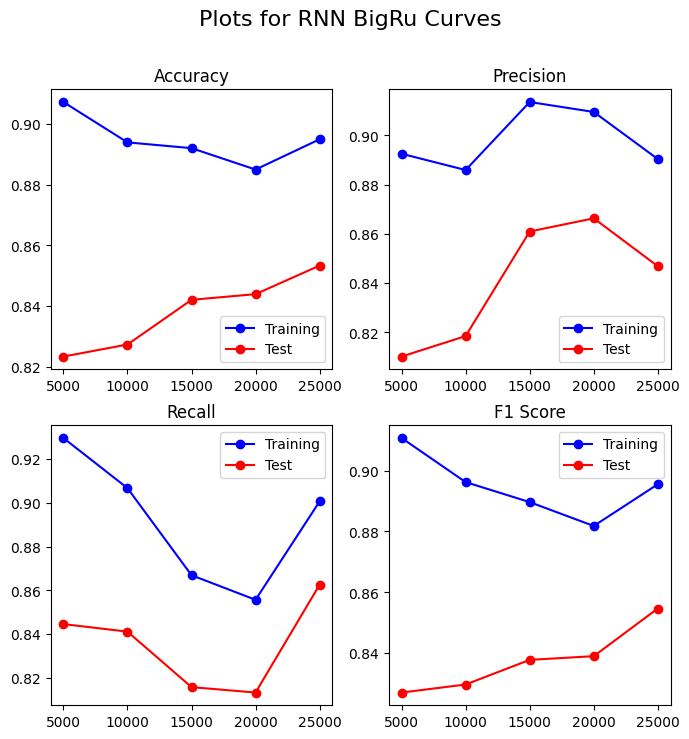

In [24]:
# Create your RNN model
imdb_ = RNN(epochs=5, vocabulary=vocabulary.tolist())

# Use the reshaped data in the custom_curve function
data = custom_curve(imdb_, x_train, y_train, x_test, y_test, 5, "RNN BigRu Curves")

In [59]:
create_a_table(data)

,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
Train Data Size (%),,,,,,,,
20,0.906600,0.81736,0.890056,0.797376,0.931658,0.85096,0.910382,0.823297
40,0.894900,0.83840,0.877405,0.820357,0.920641,0.86656,0.898503,0.842826
60,0.876667,0.83384,0.835439,0.792145,0.939466,0.90520,0.884404,0.844907
80,0.888100,0.84756,0.903992,0.858901,0.869205,0.83176,0.886257,0.845113
100,0.889960,0.85132,0.903018,0.860639,0.873760,0.83840,0.888148,0.849374


Epoch 1/5
625/625 [==============================] - 50s 79ms/step - loss: 0.2909 - binary_accuracy: 0.8777 - val_loss: 0.2878 - val_binary_accuracy: 0.8800
Epoch 2/5
625/625 [==============================] - 48s 77ms/step - loss: 0.2712 - binary_accuracy: 0.8863 - val_loss: 0.3092 - val_binary_accuracy: 0.8740
Epoch 3/5
625/625 [==============================] - 48s 77ms/step - loss: 0.2603 - binary_accuracy: 0.8916 - val_loss: 0.3235 - val_binary_accuracy: 0.8624
Epoch 4/5
625/625 [==============================] - 49s 78ms/step - loss: 0.2456 - binary_accuracy: 0.8992 - val_loss: 0.3557 - val_binary_accuracy: 0.8534
Epoch 5/5
625/625 [==============================] - 48s 77ms/step - loss: 0.2280 - binary_accuracy: 0.9072 - val_loss: 0.3706 - val_binary_accuracy: 0.8502


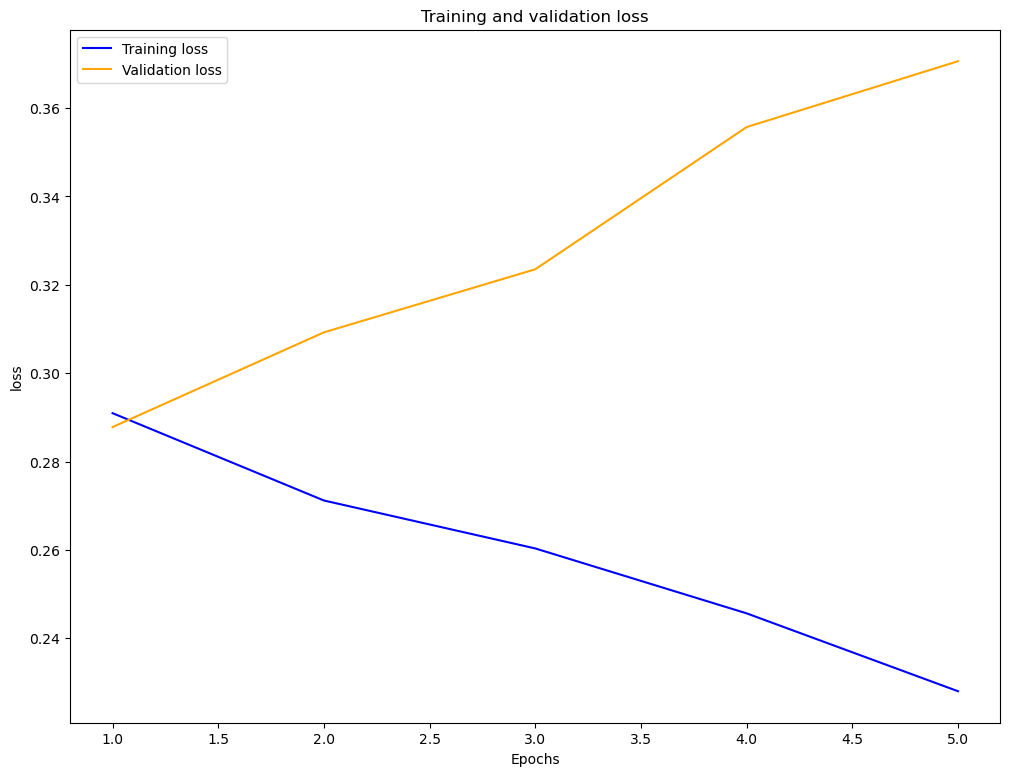

In [60]:
imdb_bigru_history = imdb_.get_history(x_train, y_train)
loss_plot(imdb_bigru_history, 'loss')

In [26]:
pip install pydo

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB 1.3 MB/s eta 0:00:01
     -- ------------------------------------- 0.1/1.1 MB 787.7 kB/s eta 0:00:02
     ---- ----------------------------------- 0.1/1.1 MB 901.1 kB/s eta 0:00:02
     -------- ------------------------------- 0.2/1.1 MB 1.3 MB/s eta 0:00:01
     ---------- ----------------------------- 0.3/1.1 MB 1.3 MB/s eta 0:00:01
     ------------------ --------------------- 0.5/1.1 MB 1.8 MB/s eta 0:00:01
     --------------------------- ------------ 0.8/1.1 MB 2.3 MB/s eta 0:00:01
     ----------------------------------- ---- 1.0/1.1 MB 2.5 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/41.7 kB ? eta -:--:--
     ---------------------------------------- 41.7/41.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/85.4 kB ? eta -:--:--


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

imdb_mlp = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(len(vocabulary),)),  # input layer. size of the input vectors
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(units=1, activation='sigmoid')  # binary classification
])


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Epoch 1/5


782/782 [==============================] - 2s 2ms/step - loss: 0.1884 - binary_accuracy: 0.9212
Epoch 2/5
782/782 [==============================] - 2s 2ms/step - loss: 0.1850 - binary_accuracy: 0.9221
Epoch 3/5
782/782 [==============================] - 1s 2ms/step - loss: 0.1753 - binary_accuracy: 0.9268
Epoch 4/5
782/782 [==============================] - 1s 2ms/step - loss: 0.1714 - binary_accuracy: 0.9244
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.1720 - binary_accuracy: 0.9254
Epoch 1/5
157/157 [==============================] - 36s 173ms/step - loss: 0.6917 - binary_accuracy: 0.5228
Epoch 2/5
157/157 [==============================] - 28s 178ms/step - loss: 0.6106 - binary_accuracy: 0.6746
Epoch 3/5
157/157 [==============================] - 26s 168ms/step - loss: 0.4450 - binary_accuracy: 0.7968
Epoch 4/5
157/157 [==============================] - 26s 168ms/step - loss: 0.3817 - binary_accuracy: 0.8352
Epoch 5/5
782/782 [=========================

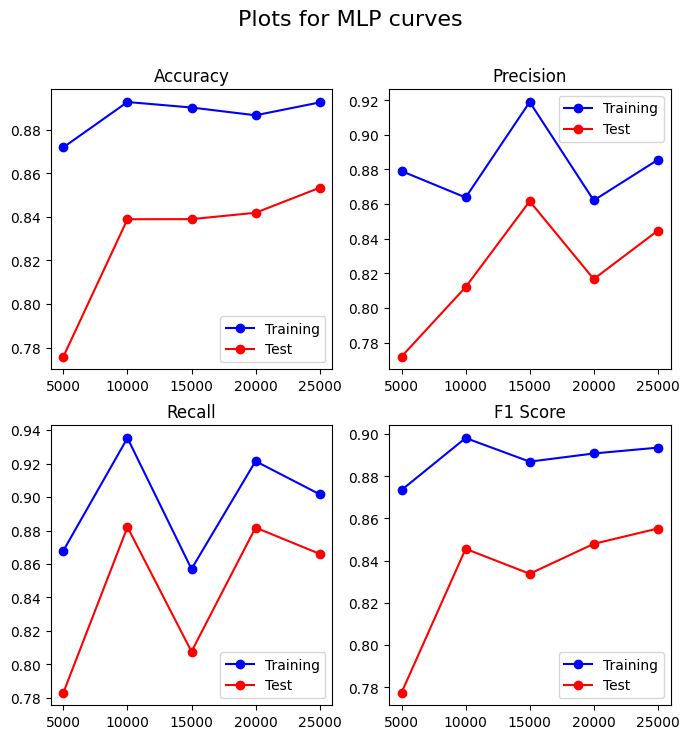

In [36]:
imdb_mlp.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['binary_accuracy'])
mlp_history = imdb_mlp.fit(x=x_train_binary, y=y_train,
             epochs=5, verbose=1, batch_size=32)
data = custom_curve(imdb_, x_train, y_train, x_test, y_test, 5, "MLP curves")

In [34]:
create_a_table(data)

,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
Train Data Size (%),,,,,,,,
20,0.86500,0.80424,0.919319,0.858098,0.805577,0.72904,0.858698,0.788322
40,0.88400,0.83356,0.849148,0.801330,0.936869,0.88704,0.890854,0.842009
60,0.89360,0.84256,0.897336,0.844545,0.889951,0.83968,0.893628,0.842105
80,0.88555,0.84372,0.857830,0.816175,0.925132,0.88728,0.890211,0.850243
100,0.89032,0.85024,0.901762,0.857563,0.876080,0.84000,0.888736,0.848691


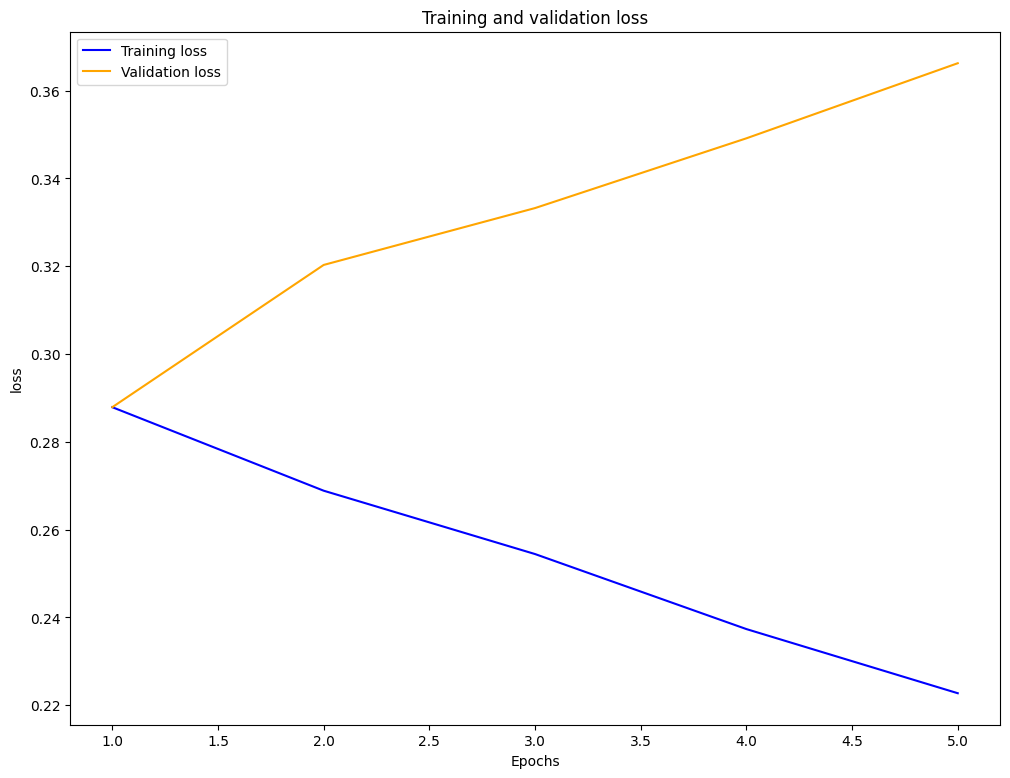

In [51]:
def plot(his, kind):
  train = his.history[kind]
  val = his.history['val_' + kind]
  epochs = range(1, len(train)+1)
  plt.figure(figsize=(12,9))
  plt.plot(epochs, train, 'b', label='Training ' + kind)
  plt.plot(epochs, val, 'orange', label='Validation ' + kind)
  plt.title('Training and validation ' + kind)
  plt.xlabel('Epochs')
  plt.ylabel(kind)
  # x1, x2, y1, y2 = plt.axis()
  # plt.axis((x1, x2, 0, 0.2))
  plt.legend()
  plt.show()
plot(mlp_history, 'loss')